In [47]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # updated
import seaborn as sns
import numpy as np

# Load pre-processed data sets

In [48]:
movie_actor_df=pd.read_csv("GeneratedData\movies_actors.csv")

In [49]:
movie_actor_df.head()

,Title,Actor
0,Avatar,Sam Worthington
1,Avatar,Zoe Saldana
2,Avatar,Sigourney Weaver
3,Pirates of the Caribbean: At World's End,Johnny Depp
4,Pirates of the Caribbean: At World's End,Orlando Bloom


In [50]:
movies_money_df=pd.read_csv("GeneratedData\movies.csv")

In [51]:
movies_money_df.head()

,Budget,Revenue,Title,Average Vote,release_date,Release Year,"Revenue, USD mln","Budget, USD mln","Revenue Adjusted, USD mln",Revenue Adjusted,"Budget Adjusted, USD mln",Outlier,Starring Actors Popularity
0,92620000,650422,Metropolis,8.0,1927-01-10,1927.0,0.650422,92.62,9.301338,9.301338e+06,1324.509264,True,0.000000
1,380000000,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,2011-05-14,2011.0,1045.713802,380.00,1248.636967,1.248637e+09,453.739873,False,7103.622020
2,300000000,961000000,Pirates of the Caribbean: At World's End,6.9,2007-05-19,2007.0,961.000000,300.00,1291.503641,1.291504e+09,403.174914,False,4383.529869
3,270000000,391081192,Superman Returns,5.4,2006-06-28,2006.0,391.081192,270.00,541.347832,5.413478e+08,373.743145,False,1555.519755
4,200000000,1845034188,Titanic,7.5,1997-11-18,1997.0,1845.034188,200.00,3332.336975,3.332337e+09,361.222247,True,324.643821


# Numbers of movies relased through years 

The chart below shows total number of movies from the original (not cleaned) dataset. All unique entries except 4 candidates for duplicates.

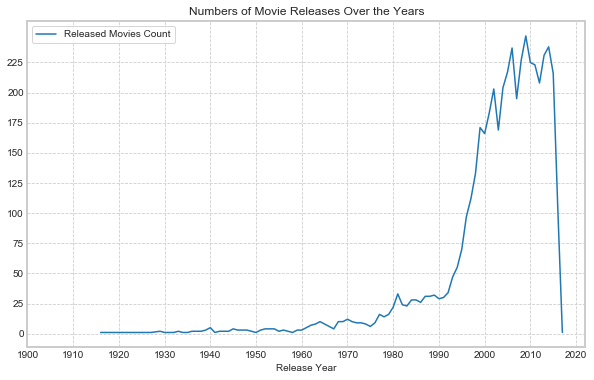

In [52]:
movies = pd.read_csv("Craig_portion/Resources/tmdb_5000_movies.csv")
movies_df = pd.DataFrame(movies)
movies_df['Release Year']=movies_df['release_date'].str[:4].astype(float)

movies_count_by_year=movies_df.groupby(by="Release Year")["title"].count().reset_index().rename(columns={"title":"Released Movies Count"})

sns.set_style(style='whitegrid',rc={'axes.linewidth': 2.0, 'legend.frameon': True, 'grid.linestyle': u'--',  'legend.scatterpoints': 1, 'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 10, 'axes.titlesize': 8, 'xtick.labelsize': 12, 'ytick.labelsize': 10})
plt.figure(figsize=(10,6)) # updated
movies_count_by_year.plot(x="Release Year",y="Released Movies Count", ax = plt.gca()) # updated
plt.xticks(np.arange(1900,2021,10))
plt.yticks(np.arange(0,250,25))
plt.title("Numbers of Movie Releases Over the Years")# added
plt.savefig("OutputImages/Numbers of Movie Releases Over the Years.png",dpi=300) #added
plt.show()

# Buckets by Release Year

Because of large difference in numbers of movies released over the years, the movies are broken down into release year buckets.

In [53]:
#updated
year_buckets=[1960,1995]
movie_year_bucket=[]
movie_year_bucket_no=[]
year_buckets_labels=[]
for i in range(0,len(year_buckets)+1):
    if i==0:
        year_buckets_labels.append("before "+str(year_buckets[0]))
    elif i==len(year_buckets):
        year_buckets_labels.append("after "+str(year_buckets[-1]))
    else:
        year_buckets_labels.append(str(year_buckets[i-1])+" to "+str(year_buckets[i]))

for index,row in movies_money_df.iterrows():
    if row["Release Year"]<year_buckets[0]:
        movie_year_bucket.append(year_buckets_labels[0])
        movie_year_bucket_no.append(1)
    elif row["Release Year"]>=year_buckets[-1]:
        movie_year_bucket.append(year_buckets_labels[-1])
        movie_year_bucket_no.append(len(year_buckets)+1)
    else:
        ok=False
        for i in range(len(year_buckets)-1):
            if(year_buckets[i]<=row["Release Year"]<year_buckets[i+1]):
                movie_year_bucket.append(year_buckets_labels[i+1])
                movie_year_bucket_no.append(i+2)                
                ok=True
        if(ok==False):
            movie_year_bucket.append("undefined")
            movie_year_bucket_no.append(0)
       

movies_money_df["Years"]=movie_year_bucket
movies_money_df["Release Years Bucket"]=movie_year_bucket_no
year_buckets_labels

['before 1960', '1960 to 1995', 'after 1995']

# Buckets by Budget

Because of large difference in budgets, we break down movies into budget buckets. 

In [54]:
#modified, replace budget to budget
budget_buckets=[0.5,10,100] #updated
budget_bucket=[]
budget_bucket_no=[]
budget_buckets_labels=[]
units_str="USD mln"
for i in range(0,len(budget_buckets)+1):
    if i==0:
        budget_buckets_labels.append("<"+str(budget_buckets[0])+" "+units_str)
    elif i==len(budget_buckets):
        budget_buckets_labels.append(">"+str(budget_buckets[-1])+" "+units_str)
    else:
        budget_buckets_labels.append(str(budget_buckets[i-1])+"-"+str(budget_buckets[i])+" "+units_str)
        
for index,row in movies_money_df.iterrows():
    if row["Budget Adjusted, USD mln"]<budget_buckets[0]:
        budget_bucket.append(budget_buckets_labels[0])
        budget_bucket_no.append(1)
    elif row["Budget Adjusted, USD mln"]>=budget_buckets[-1]:
        budget_bucket.append(budget_buckets_labels[-1])
        budget_bucket_no.append(len(budget_buckets)+1)
    else:
        ok=False
        for i in range(len(budget_buckets)-1):#updated
            if(budget_buckets[i]<=row["Budget Adjusted, USD mln"]<budget_buckets[i+1]):
                budget_bucket.append(budget_buckets_labels[i+1])
                budget_bucket_no.append(i+2)
                ok=True
        if(ok==False):
            budget_bucket.append("undefined")
            budget_bucket_no.append(0)
            

movies_money_df["Budget Tier"]=budget_bucket
movies_money_df["Budget Tier No"]=budget_bucket_no
budget_buckets_labels

['<0.5 USD mln', '0.5-10 USD mln', '10-100 USD mln', '>100 USD mln']

# Revenues by release year and revenue tiers

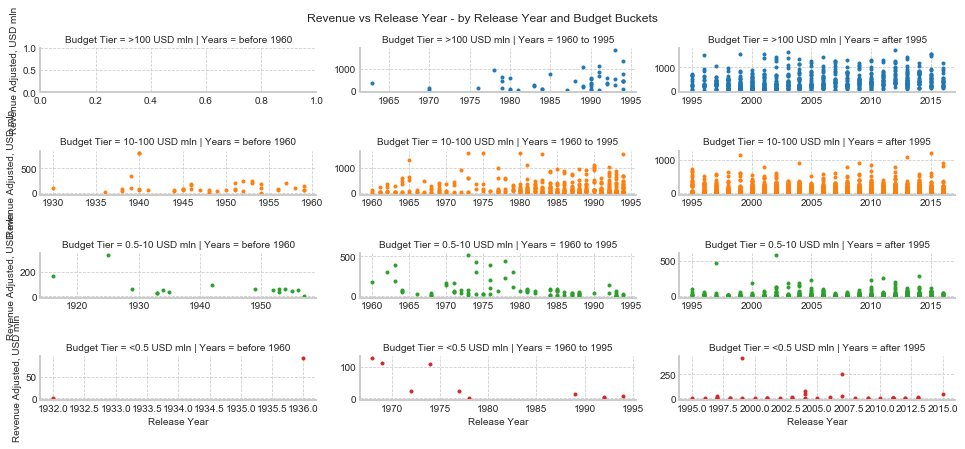

In [55]:
g = sns.FacetGrid(movies_money_df[~movies_money_df["Outlier"]], row="Budget Tier", row_order=list(reversed(budget_buckets_labels)), col="Years", col_order=year_buckets_labels, sharex=False, sharey=False, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)), size=1.5,aspect=3) #updated
g = g.map(plt.scatter, 'Release Year', 'Revenue Adjusted, USD mln', marker='.')
plt.suptitle("Revenue vs Release Year - by Release Year and Budget Buckets")
plt.savefig("OutputImages/Revenue vs Release Year - by Release Year and Budget Buckets.png",dpi=300) #added
g.fig.subplots_adjust(top=.9)
plt.show()

# Analysis of Average Vote data

## Average Vote vs. Budget
As seen from the plots, budgets are not the determinig factor for movie rating. In some cases high budgets did not ensure high rating.


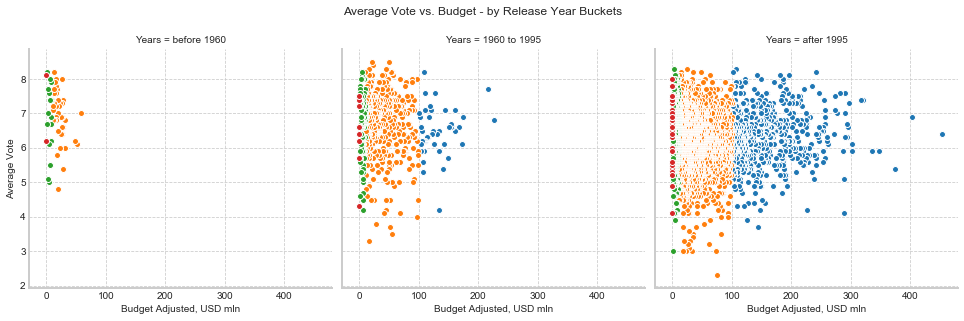

In [56]:
g = sns.FacetGrid(movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], col="Years", col_order=year_buckets_labels, sharex=True, sharey=True, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)), size=4.5) #updated
g = g.map(plt.scatter, 'Budget Adjusted, USD mln', 'Average Vote', edgecolor="w", marker='o')#updated
plt.suptitle("Average Vote vs. Budget - by Release Year Buckets")
g.fig.subplots_adjust(top=.85)
plt.savefig("OutputImages/Average Vote vs Budget - by Release Year Buckets.png",dpi=300) #added
plt.show()

## Average Vote vs. Revenue

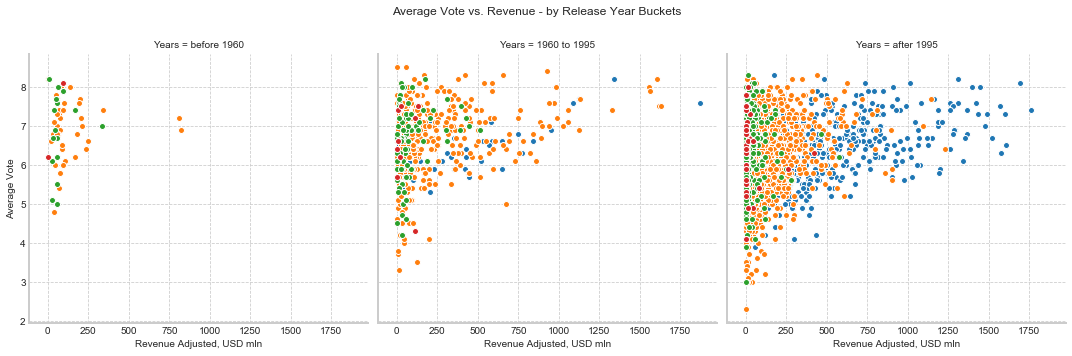

In [98]:
g = sns.FacetGrid(movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], col="Years", col_order=year_buckets_labels, sharex=True, sharey=True, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=4.5) #updated
g = g.map(plt.scatter, 'Revenue Adjusted, USD mln', 'Average Vote', edgecolor="w", marker='o')#updated
plt.suptitle("Average Vote vs. Revenue - by Release Year Buckets")
g.fig.subplots_adjust(top=.85)
plt.savefig("OutputImages/Average Vote vs Revenue - by Release Year Buckets.png",dpi=300) #added
plt.show()

## Average Vote vs. Prior Popularity of Starring Actors

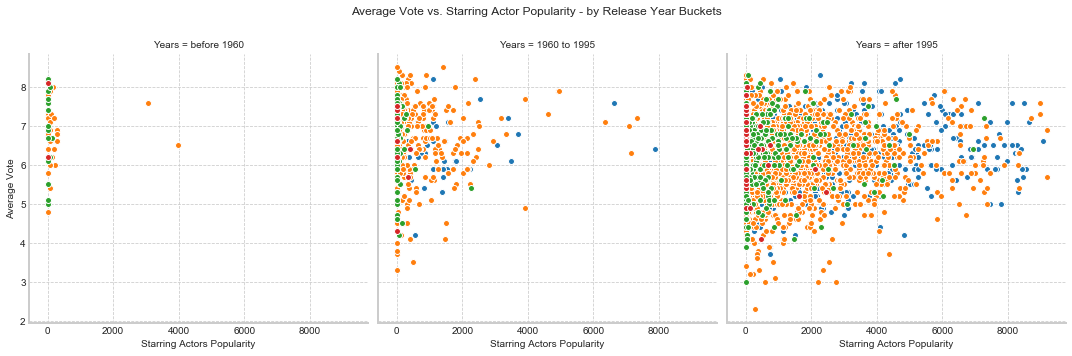

In [97]:
g = sns.FacetGrid(movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], col="Years", col_order=year_buckets_labels, sharex=True, sharey=True, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=4.5) #updated
g = g.map(plt.scatter, 'Starring Actors Popularity', 'Average Vote', edgecolor="w", marker='o')#updated
plt.suptitle("Average Vote vs. Starring Actor Popularity - by Release Year Buckets")
g.fig.subplots_adjust(top=.85)
plt.savefig("OutputImages/Average Vote vs Starring actor popularity - by Release Year Buckets.png",dpi=300) #added
plt.show()

## Average vote - Conclusions

 - On the assumption that the vote data is authenic, the higher is either of the above factots considered, less likely the movie quality is estimated low
 - On the other hand, the estimate/vote does not necessarily increase with increase of any of the above considered factors
 - Revenue does not indicate the quality of a movie. Movies with low revenues are estimated as high as the movies with high revenues. Same for movie budgets
 

# Analysis of Impact of Starring Actor Popularity Factor

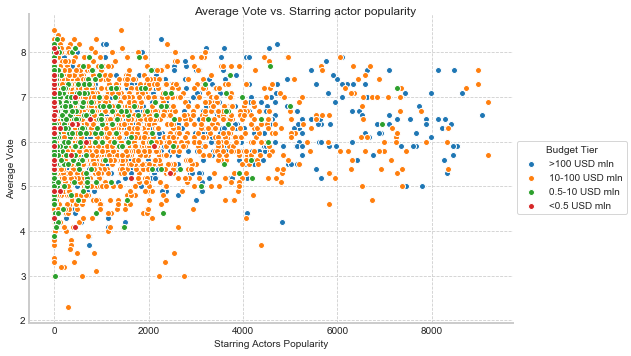

In [80]:
g = sns.pairplot(movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], x_vars="Starring Actors Popularity", y_vars="Average Vote", hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=5,aspect=1.5)
plt.suptitle("Average Vote vs. Starring Actors Popularity")
plt.savefig("OutputImages/Average Vote vs Starring actor popularity.png",dpi=300) #added
plt.show()

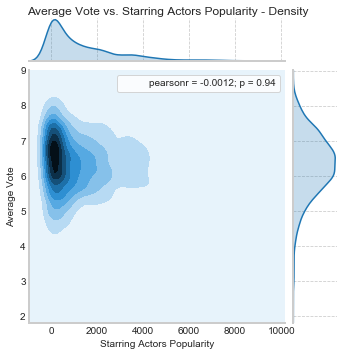

In [86]:
g = sns.jointplot(data=movies_money_df[(movies_money_df["Outlier"]==False) & (movies_money_df["Average Vote"]>0)], kind="kde",x="Starring Actors Popularity", y="Average Vote", size=5)
plt.suptitle("Average Vote vs. Starring Actors Popularity - Density")
g.fig.subplots_adjust(top=.95)
plt.savefig("OutputImages/Average Vote vs Starring actor popularity - density.png",dpi=300) #added
plt.show()

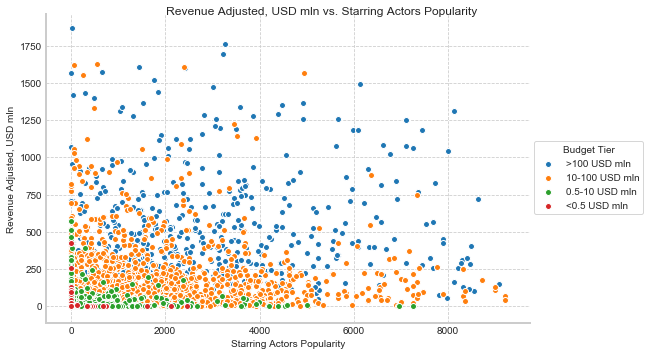

In [88]:
g = sns.pairplot(movies_money_df[~movies_money_df["Outlier"]], x_vars="Starring Actors Popularity", y_vars="Revenue Adjusted, USD mln", hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)),size=5,aspect=1.5)
plt.suptitle("Revenue Adjusted, USD mln vs. Starring Actors Popularity")
plt.savefig("OutputImages/Revenue vs Starring actor popularity.png",dpi=300) #added
plt.show()

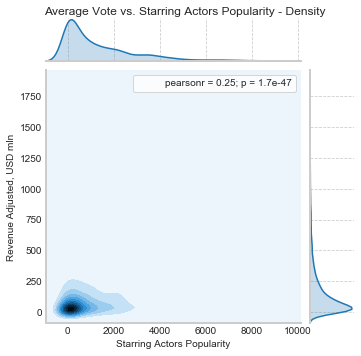

In [90]:
g = sns.jointplot(data=movies_money_df[movies_money_df["Outlier"]==False], kind="kde",x="Starring Actors Popularity", y="Revenue Adjusted, USD mln", size=5)
plt.suptitle("Average Vote vs. Starring Actors Popularity - Density")
g.fig.subplots_adjust(top=.95)
plt.savefig("OutputImages/Average Vote vs Starring actor popularity - density.png",dpi=300) #added
plt.show()

## Impact of Starring Actor Popularity Factor - Conclusions

 - Although the popularity af starring actors has a weak impact of revenues, it is not a determining factor.

# Analysis of impact of Movie Budget on Revenue

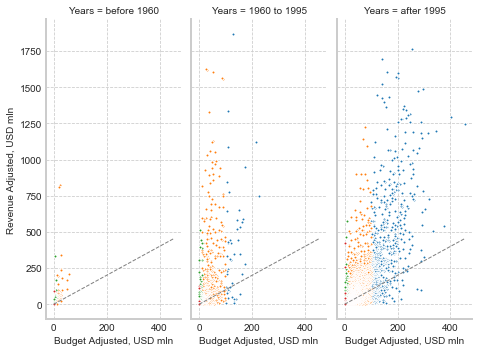

In [99]:
#added
#movies_money_df.sort_values(["Release Years Bucket"],ascending=[True],inplace=True)
max_budget=movies_money_df[movies_money_df["Outlier"]==False]["Budget Adjusted, USD mln"].values.max()
g = sns.FacetGrid(movies_money_df[movies_money_df["Outlier"]==False], col="Years", col_order=year_buckets_labels, hue="Budget Tier", hue_order=list(reversed(budget_buckets_labels)), sharex=True, sharey=True, size=5,aspect=0.45) 
g = g.map(plt.scatter,  'Budget Adjusted, USD mln', 'Revenue Adjusted, USD mln',edgecolor="w",  marker='.')
for i, ax in enumerate(g.axes.flat):
    ax.plot([0,max_budget], [0,max_budget], color='gray', linestyle='dashed', linewidth=1, markersize=0)
plt.show()

In [100]:
#added
#worst performers
def get_movie_actors(pop_from,pop_to,rev_from,rev_to):
    movies_actors=[]
    movies=movies_money_df[(movies_money_df["Starring Actors Popularity"]>=pop_from) & (movies_money_df["Starring Actors Popularity"]<=pop_to) & (movies_money_df["Revenue Adjusted, USD mln"]<=rev_to)& (movies_money_df["Revenue Adjusted, USD mln"]>=rev_from)][["Title","Release Year","Budget","Revenue","Budget Adjusted, USD mln", "Revenue Adjusted, USD mln"]]
    for index,row in movies.iterrows():
        movies_actors.append(", ".join(movie_actor_df.loc[movie_actor_df["Title"]==row["Title"],"Actor"]))
    movies["Cast"]=movies_actors
    return movies;

print("Some of worst performing movies with top cast")
get_movie_actors(8000,999999999,0,100).sort_values(["Revenue Adjusted, USD mln"],ascending=[True])



Some of worst performing movies with top cast


,Title,Release Year,Budget,Revenue,"Budget Adjusted, USD mln","Revenue Adjusted, USD mln",Cast
1076,Mortdecai,2015.0,60000000,30418560,63.654000,32.271050,"Johnny Depp, Gwyneth Paltrow, Ewan McGregor"
1718,Larry Crowne,2011.0,30000000,36160375,35.821569,43.177379,"Tom Hanks, Julia Roberts, Bryan Cranston"
1379,Extremely Loud & Incredibly Close,2011.0,40000000,55247881,47.762092,65.968859,"Thomas Horn, Tom Hanks, Sandra Bullock"
763,Rock of Ages,2012.0,75000000,59418613,86.945556,68.882458,"Julianne Hough, Diego Boneta, Tom Cruise"


In [101]:
print("Some of top performing movies without high profile stars at the time of movie release")
get_movie_actors(0,25,500,999999999).sort_values(["Revenue Adjusted, USD mln"],ascending=[False])

Some of top performing movies without high profile stars at the time of movie release


,Title,Release Year,Budget,Revenue,"Budget Adjusted, USD mln","Revenue Adjusted, USD mln",Cast
1715,Star Wars,1977.0,11000000,775398007,35.882416,2529.377603,"Mark Hamill, Harrison Ford, Carrie Fisher"
2826,Bambi,1942.0,858000,267447150,7.875518,2454.877510,"Donnie Dunagan, Peter Behn, Stan Alexander"
1914,E.T. the Extra-Terrestrial,1982.0,10500000,792910554,29.545556,2231.141238,"Henry Thomas, Drew Barrymore, Robert MacNaughton"
2483,Snow White and the Seven Dwarfs,1937.0,1488423,184925486,15.838146,1967.771858,"Adriana Caselotti, Lucille La Verne, Harry Sto..."
115,Harry Potter and the Philosopher's Stone,2001.0,125000000,976475550,200.588305,1566.956603,"Daniel Radcliffe, Rupert Grint, Emma Watson"
33,"The Chronicles of Narnia: The Lion, the Witch ...",2005.0,180000000,748806957,256.636960,1067.619671,"William Moseley, Anna Popplewell, Skandar Keynes"
112,Transformers,2007.0,150000000,709709780,201.587457,953.790598,"Shia LaBeouf, Josh Duhamel, Megan Fox"
2088,Pinocchio,1940.0,2600000,84300000,25.318598,820.906845,"Mel Blanc, Don Brodie, Walter Catlett"
2616,Crocodile Dundee,1986.0,5000000,328203506,12.500402,820.535135,"Paul Hogan, Linda Kozlowski, Mark Blum"
2205,Fantasia,1940.0,2280000,83320000,22.202463,811.363681,"Deems Taylor, Walt Disney, Julietta Novis"


In [20]:
# create datafarme with movies-genres

for index,row in movies_df.iterrows():
    given_movies_genre_value=eval(row['genres'])
    given_movie_genres_df = pd.DataFrame(given_movies_genre_value)
    given_movie_genres_df["Title"]=row['Title']
    try:
        given_movie_genres_df.drop(axis=1,columns=['id'],inplace=True)
    except:
        pass
    
    if(index==0):
        movie_genre_df=given_movie_genres_df
    else:
        movie_genre_df=movie_genre_df.append(given_movie_genres_df)

movie_genre_df.rename(columns={"name":"Genre"},inplace=True)   
movie_genre_df.head()  

KeyError: 'Title'

In [ ]:
movie_genre_df.dropna(inplace=True)                                                   
movie_genre_df.describe()

In [ ]:
genres_list={"Mood":['Comedy','Thriller','Horror','Drama','Action','Fantasy','Mystery'],
"Concept":['Crime','Science Fiction','Family','Romance','Adventure','Western','War','History']}
movie_genre_df["Genre"].value_counts()
genres_list_all=movie_genre_df["Genre"].unique()
genres_list_all

# Success of genres

In [ ]:
#added
genre_revenues_df=pd.DataFrame.merge(movie_genre_df, movies_money_df.loc[movies_money_df["Outlier"]==False],on="Title")
genre_revenues_df.sort_values(["Release Years Bucket"],ascending=[True],inplace=True)
g = sns.factorplot(y="Genre", x="Revenue Adjusted, USD mln", col="Years", data=genre_revenues_df,kind="bar", ci=68, size=5,sharey=True,sharex=True, orient="h")


In [ ]:
genre_revenues_df=pd.DataFrame.merge(movie_genre_df, movies_money_df.loc[movies_money_df["Outlier"]==False],on="Title")
genre_revenues_df.sort_values(["Release Years Bucket"],ascending=[True],inplace=True)
g = sns.factorplot(y="Genre", x="Budget Adjusted, USD mln", col="Years", data=genre_revenues_df,kind="bar", ci=68, size=5,sharey=True,sharex=True, orient="h")


In [ ]:
genre_revenues_df=pd.DataFrame.merge(movie_genre_df, movies_money_df.loc[movies_money_df["Outlier"]==False],on="Title")
genre_revenues_df.sort_values(["Release Years Bucket"],ascending=[True],inplace=True)
g = sns.factorplot(y="Genre", x=None, col="Years", data=genre_revenues_df,kind="count",size=5,sharey=True,sharex=True, orient="h")


In [ ]:
actor_genres_df=pd.DataFrame.merge(movie_actor_df,movie_genre_df, on="Title")
actor_genres_df.dropna(inplace=True)
actor_genres_df.head()

In [ ]:
actor_genres_counts=actor_genres_df.groupby(by=["Actor","Genre"]).count()
actor_genres_counts.rename(columns={"Title":"Movies Count"},inplace=True)
actor_genres_counts.reset_index(inplace=True)
actor_genres_counts.head()

# Actors starred most, by movie genre 

In [ ]:
actors_name=[]
actors_genre=[]
actors_genre_count=[]

for genre in genres_list_all:
    given_genre_actors=actor_genres_counts.loc[actor_genres_counts["Genre"]==genre]
    given_genre_actors_max=given_genre_actors.loc[given_genre_actors["Movies Count"].idxmax()]
    actors_genre.append(genre)
    actors_name.append(given_genre_actors_max["Actor"])
    actors_genre_count.append(given_genre_actors_max["Movies Count"])


actors_genre_top_df=pd.DataFrame.from_dict({'Actor': actors_name, 'Genre': actors_genre, 'Count': actors_genre_count})
actors_genre_top_df.loc[actors_genre_top_df["Genre"].isin(genres_list["Mood"])].sort_values(["Count"],ascending=[False])
